In [172]:
import pandas as pd
import numpy as np
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, balanced_accuracy_score, ConfusionMatrixDisplay

## First pass Model

In [2]:
data = pd.read_csv('../data/train_clean.csv')

In [3]:
data.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,no_response,no_response,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,no_response,no_response,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [4]:
data.dtypes

respondent_id                    int64
h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1                object
doctor_recc_seasonal            object
chronic_med_condition           object
child_under_6_months           float64
health_worker                   object
health_insurance                object
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                      

In [5]:
categorical_columns = list(data.select_dtypes('object').columns)
categorical_columns

['doctor_recc_h1n1',
 'doctor_recc_seasonal',
 'chronic_med_condition',
 'health_worker',
 'health_insurance',
 'age_group',
 'education',
 'race',
 'sex',
 'income_poverty',
 'marital_status',
 'rent_or_own',
 'employment_status',
 'hhs_geo_region',
 'census_msa',
 'employment_industry',
 'employment_occupation']

In [6]:
X = data.drop(columns=['h1n1_vaccine', 'seasonal_vaccine'])
y = data['h1n1_vaccine']

In [7]:
Xd = pd.get_dummies(data=X, columns=categorical_columns, drop_first=True)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(Xd, y, random_state=42, stratify=y)

In [9]:
X_train = np.array(X_train)
X_test = np.array(X_test)

In [10]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
xg_cls = xgb.XGBClassifier(random_state=42, use_label_encoder=False)

params = {
    'n_estimators' : [100, 200, 250],
    'max_depth' : list(range(3, 11)),
    'learning_rate' : [0.01, 0.005, 0.1, 0.3],
    'colsample_bytree' : [0.5, 0.75, 1],
    'subsample' : [0.6, 0.8, 1] 
}

gs = GridSearchCV(estimator=xg_cls, param_grid=params, scoring='roc_auc')

gs.fit(X_train, y_train)

y_pred = gs.predict(X_test)

[16:24:13] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:24:14] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:24:14] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:24:15] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation me

In [ ]:
gs.best_score_

In [ ]:
gs.best_estimator_

In [ ]:
gs.best_params_

In [ ]:
accuracy_score(y_test, y_pred)

In [ ]:
precision_score(y_test, y_pred)

In [ ]:
recall_score(y_test, y_pred)

In [ ]:
roc_auc_score(y_test, y_pred)

#### Scores for predicting h1n1 don't look too good with the current dataset. 
**Switching labels for positive and negative class. In original dataset, vaccinated=1, unvaccinated=0. I will switch them so vaccinated=0 and unvaccinated=1 since we're more interested in the unvaccinated calss.**

In [ ]:
data = pd.read_csv('../data/train_clean.csv')

In [ ]:
data['h1n1_vaccine'].value_counts()

In [ ]:
data['seasonal_vaccine'].value_counts()

In [ ]:
# since we're interested in the people who did not get vaccinated: switch 0 and 1 labels
data['h1n1_vaccine'].replace({1:0, 0:1}, inplace=True)
data['h1n1_vaccine'].value_counts()

data['seasonal_vaccine'].replace({1:0, 0:1}, inplace=True)
data['seasonal_vaccine'].value_counts()

In [ ]:
X = data.drop(columns=['h1n1_vaccine', 'seasonal_vaccine'])
y = data['h1n1_vaccine']

In [ ]:
Xd = pd.get_dummies(data=X, columns=categorical_columns, drop_first=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(Xd, y, random_state=42, stratify=y)

In [ ]:
X_train = np.array(X_train)
X_test = np.array(X_test)

In [ ]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
model = xgb.XGBClassifier(random_state=42,
                          use_label_encoder=False,
                          colsample_bytree=0.5,
                          learning_rate=0.1,
                          max_depth=3,
                          n_estimators=200,
                          subsample=1
                         )
model.fit(X_train, y_train)


In [ ]:
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

In [ ]:
sum(y_train), len(y_train)

In [ ]:
pd.Series(y_train).value_counts()

In [ ]:
sum(y_test),len(y_test), sum(test_pred),len(test_pred)

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, test_pred, display_labels=['Vaccinated', 'Unvaccinated'])

In [ ]:
accuracy_score(y_test, test_pred), accuracy_score(y_train, train_pred)

In [ ]:
precision_score(y_test, test_pred)

In [ ]:
recall_score(y_test, test_pred)

In [ ]:
roc_auc_score(y_test, test_pred)

#### Switch classes fromoriginal and use seasonal vaccine as a feature 

In [ ]:
data = pd.read_csv('../data/train_clean.csv')

In [ ]:
data['h1n1_vaccine'].value_counts()

In [ ]:
data['seasonal_vaccine'].value_counts()

In [ ]:
# since we're interested in the people who did not get vaccinated: switch 0 and 1 labels
data['h1n1_vaccine'].replace({1:0, 0:1}, inplace=True)
data['h1n1_vaccine'].value_counts()

data['seasonal_vaccine'].replace({1:0, 0:1}, inplace=True)
data['seasonal_vaccine'].value_counts()

In [ ]:
X = data.drop(columns=['h1n1_vaccine'])
y = data['h1n1_vaccine']

In [ ]:
Xd = pd.get_dummies(data=X, columns=categorical_columns, drop_first=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(Xd, y, random_state=42, stratify=y)

In [ ]:
X_train = np.array(X_train)
X_test = np.array(X_test)

In [ ]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
model = xgb.XGBClassifier(random_state=42,
                          use_label_encoder=False,
                          colsample_bytree=0.5,
                          learning_rate=0.1,
                          max_depth=3,
                          n_estimators=200,
                          subsample=1
                         )
model.fit(X_train, y_train)


In [ ]:
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

In [ ]:
sum(y_train), len(y_train)

In [ ]:
pd.Series(y_train).value_counts()

In [ ]:
sum(y_test),len(y_test), sum(test_pred),len(test_pred)

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, test_pred, display_labels=['Vaccinated', 'Unvaccinated'])

In [ ]:
accuracy_score(y_test, test_pred), accuracy_score(y_train, train_pred)

In [ ]:
precision_score(y_test, test_pred)

In [ ]:
recall_score(y_test, test_pred)

In [ ]:
roc_auc_score(y_test, test_pred)

## Best Model for Recall Score
#### Switch classes from original and do some feature engineering
Such as make a new feature that is 1 if the subject had both h1n1_concern and h1n1_knowledge, another one for all the behaviors and a third one for doctor recommended

In [2]:
data = pd.read_csv('../data/train_clean.csv')

In [3]:
data.columns

Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation', 'h1n1_vaccine', 'seasonal_vaccine'],
      dtype='object')

In [4]:
data['h1n1_vaccine'].value_counts(normalize=True)

0    0.787546
1    0.212454
Name: h1n1_vaccine, dtype: float64

In [5]:
data['seasonal_vaccine'].value_counts(normalize=True)

0    0.534392
1    0.465608
Name: seasonal_vaccine, dtype: float64

In [6]:
# since we're interested in the people who did not get vaccinated: switch 0 and 1 labels
data['h1n1_vaccine'].replace({1:0, 0:1}, inplace=True)
data['h1n1_vaccine'].value_counts()

data['seasonal_vaccine'].replace({1:0, 0:1}, inplace=True)
data['seasonal_vaccine'].value_counts()

1    14272
0    12435
Name: seasonal_vaccine, dtype: int64

**Feature Engineering**

Doctor recommended features

In [7]:
#####
data['doctor_recc_h1n1'].value_counts()

0.0            19139
1.0             5408
no_response     2160
Name: doctor_recc_h1n1, dtype: int64

In [8]:
data['doctor_recc_h1n1'].dtypes

dtype('O')

In [9]:
data['doctor_recc_h1n1'] = data['doctor_recc_h1n1'].replace({'0.0': 1, '1.0': 2, 'no_response': 0})

data['doctor_recc_h1n1'].value_counts()

1    19139
2     5408
0     2160
Name: doctor_recc_h1n1, dtype: int64

In [10]:
#####
data['doctor_recc_seasonal'].value_counts()

0.0            16453
1.0             8094
no_response     2160
Name: doctor_recc_seasonal, dtype: int64

In [11]:
data['doctor_recc_seasonal'] = data['doctor_recc_seasonal'].replace({'0.0': 1, '1.0': 2, 'no_response': 0})
data['doctor_recc_seasonal'].value_counts()

1    16453
2     8094
0     2160
Name: doctor_recc_seasonal, dtype: int64

In [12]:
#####
data['chronic_med_condition'].value_counts()

0.0            18446
1.0             7290
no_response      971
Name: chronic_med_condition, dtype: int64

In [13]:
data['chronic_med_condition'] = data['chronic_med_condition'].replace({'no_response' : 0, '0.0' : 1, '1.0': 2})
data['chronic_med_condition'].value_counts()

1    18446
2     7290
0      971
Name: chronic_med_condition, dtype: int64

In [14]:
#####
data['age_group'].value_counts()

65+ Years        6843
55 - 64 Years    5563
45 - 54 Years    5238
18 - 34 Years    5215
35 - 44 Years    3848
Name: age_group, dtype: int64

In [15]:
data['age_group'].replace({
    '18 - 34 Years' : 0,
    '35 - 44 Years' : 1,
    '45 - 54 Years' : 2,
    '55 - 64 Years' : 3,
    '55 - 64 Years' : 4,
    '65+ Years' : 5
    
}, inplace=True)

data['age_group'].value_counts()

5    6843
4    5563
2    5238
0    5215
1    3848
Name: age_group, dtype: int64

In [16]:
#####

data['health_worker'].value_counts()

no             23004
yes             2899
no_response      804
Name: health_worker, dtype: int64

In [17]:
data['health_worker'].replace({'no_response': 0,'no': 1, 'yes': 2}, inplace=True)
data['health_worker'].value_counts()

1    23004
2     2899
0      804
Name: health_worker, dtype: int64

In [18]:
# make a new feature h1n1_all for participants who had both h1n1_concern and h1n1_knowledge
data[['h1n1_concern', 'h1n1_knowledge']].dtypes

h1n1_concern      float64
h1n1_knowledge    float64
dtype: object

In [19]:
data['h1n1_all'] = data['h1n1_concern'] * data['h1n1_knowledge']

In [20]:
# make a new feature h1n1_all for participants who responded yes to all the behavior questions
behaviour_columns = [column for column in list(data.columns) if 'behavioral' in column]
data[behaviour_columns].dtypes

behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
dtype: object

In [21]:
data['behavioral_all'] = 1

for column in behaviour_columns:
    data['behavioral_all'] = data['behavioral_all'] * data[column]

In [22]:
# make a new feature opinion_all for participants based on their opinion scores to the opinion questions
opinion_columns = [column for column in list(data.columns) if 'opinion' in column]
data[opinion_columns].dtypes

opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
dtype: object

In [23]:
data['opinion_all'] = 1

for column in opinion_columns:
    data['opinion_all'] = data['opinion_all'] * data[column]

In [24]:
# doctor recommended columns
doctor_columns = [column for column in list(data.columns) if 'doctor' in column]

data['doctor_recc_all'] = 1

for column in opinion_columns:
    data['doctor_recc_all'] = data['doctor_recc_all'] * data[column]

In [25]:
# health_worker and age group

data['health_worker_by_age'] = data['health_worker'] * data['age_group']

In [26]:
data.columns

Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation', 'h1n1_vaccine', 'seasonal_vaccine', 'h1n1_all',
       'behavioral_all', 'opinion_all', 'doctor_recc_all',
       'health_worker_by_age'],
   

**Model without new features**

In [27]:
X = data.drop(columns=['h1n1_vaccine', 'seasonal_vaccine', 'h1n1_all',
       'behavioral_all', 'opinion_all', 'doctor_recc_all',
       'health_worker_by_age'])
y = data['h1n1_vaccine']

In [28]:
categorical_columns = list(X.select_dtypes('object').columns)
categorical_columns

['health_insurance',
 'education',
 'race',
 'sex',
 'income_poverty',
 'marital_status',
 'rent_or_own',
 'employment_status',
 'hhs_geo_region',
 'census_msa',
 'employment_industry',
 'employment_occupation']

In [29]:
Xd = pd.get_dummies(data=X, columns=categorical_columns, drop_first=True)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(Xd, y, random_state=42, stratify=y)

In [31]:
X_train = np.array(X_train)
X_test = np.array(X_test)

In [32]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [33]:
model = xgb.XGBClassifier(random_state=42,
                          use_label_encoder=False,
                          colsample_bytree=0.3,
                          learning_rate=0.01,
                          max_depth=8,
                          n_estimators=300,
                          subsample=1
                         )
model.fit(X_train, y_train)


[16:28:36] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=300, n_jobs=16, num_parallel_tree=1,
              predictor='auto', random_state=42, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)

In [34]:
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

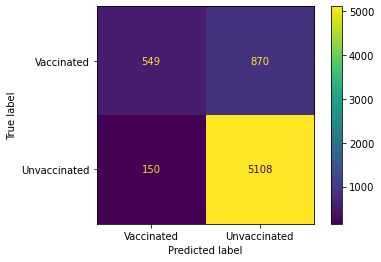

In [37]:
ConfusionMatrixDisplay.from_predictions(y_test, test_pred, display_labels=['Vaccinated', 'Unvaccinated'])

In [38]:
balanced_accuracy_score(y_test, test_pred), balanced_accuracy_score(y_train, train_pred)

(0.6791821100958009, 0.7274214543903788)

In [39]:
precision_score(y_test, test_pred)

0.8544663767146202

In [40]:
recall_score(y_test, test_pred)

0.9714720426017497

In [41]:
roc_auc_score(y_test, test_pred)

0.6791821100958009

**Model with engineered features**

In [42]:
X = data.drop(columns=['h1n1_vaccine', 'seasonal_vaccine'])
y = data['h1n1_vaccine']

In [43]:
categorical_columns = list(X.select_dtypes('object').columns)
categorical_columns

['health_insurance',
 'education',
 'race',
 'sex',
 'income_poverty',
 'marital_status',
 'rent_or_own',
 'employment_status',
 'hhs_geo_region',
 'census_msa',
 'employment_industry',
 'employment_occupation']

In [44]:
Xd = pd.get_dummies(data=X, columns=categorical_columns, drop_first=True)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(Xd, y, random_state=42, stratify=y)

In [46]:
X_train = np.array(X_train)
X_test = np.array(X_test)

In [47]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [48]:
model = xgb.XGBClassifier(random_state=42,
                          use_label_encoder=False,
                          colsample_bytree=0.3,
                          learning_rate=0.01,
                          max_depth=8,
                          n_estimators=300,
                          subsample=1
                         )
model.fit(X_train, y_train)


[16:29:02] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=300, n_jobs=16, num_parallel_tree=1,
              predictor='auto', random_state=42, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)

In [49]:
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

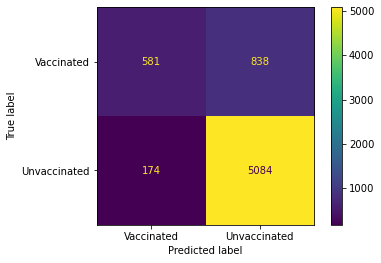

In [51]:
ConfusionMatrixDisplay.from_predictions(y_test, test_pred, display_labels=['Vaccinated', 'Unvaccinated'])

In [52]:
balanced_accuracy_score(y_test, test_pred), balanced_accuracy_score(y_train, train_pred)

(0.6881754196632079, 0.7400606352924963)

In [53]:
precision_score(y_test, test_pred)

0.8584937521107734

In [54]:
recall_score(y_test, test_pred)

0.9669075694180297

In [55]:
roc_auc_score(y_test, test_pred)

0.6881754196632079

### **Using oversampling to oversample the minority class**

In [ ]:
X = data.drop(columns=['h1n1_vaccine', 'seasonal_vaccine'])
y = data['h1n1_vaccine']

In [ ]:
Xd = pd.get_dummies(data=X, columns=categorical_columns, drop_first=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(Xd, y, random_state=42, stratify=y)

In [ ]:
ros = RandomOverSampler()

X_train_over, y_train_over = ros.fit_resample(X_train, y_train)


In [ ]:
X_train_over = np.array(X_train_over)
X_test = np.array(X_test)

In [ ]:
y_train_over = np.array(y_train_over)
y_test = np.array(y_test)

In [ ]:
model = xgb.XGBClassifier(random_state=42,
                          use_label_encoder=False,
                          colsample_bytree=0.5,
                          learning_rate=0.1,
                          max_depth=3,
                          n_estimators=200,
                          subsample=1
                         )
model.fit(X_train_over, y_train_over)


In [ ]:
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

In [ ]:
sum(y_train), len(y_train)

In [ ]:
pd.Series(y_train).value_counts()

In [ ]:
sum(y_test),len(y_test), sum(test_pred),len(test_pred)

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, test_pred, display_labels=['Vaccinated', 'Unvaccinated'])

In [ ]:
accuracy_score(y_test, test_pred), accuracy_score(y_train, train_pred)

In [ ]:
precision_score(y_test, test_pred)

In [ ]:
recall_score(y_test, test_pred)

In [ ]:
roc_auc_score(y_test, test_pred)

### **Using SMOTE to oversample minority class, and include best features**

In [108]:
X = data.drop(columns=['h1n1_vaccine', 'seasonal_vaccine'])
y = data['h1n1_vaccine']

In [109]:
Xd = pd.get_dummies(data=X, columns=categorical_columns, drop_first=True)

In [110]:
X_train, X_test, y_train, y_test = train_test_split(Xd, y, random_state=42, stratify=y)

In [111]:
from imblearn.over_sampling import SMOTE

smo = SMOTE(k_neighbors=7, random_state=42)

X_train_over, y_train_over = smo.fit_resample(X_train, y_train)


In [112]:
X_train_over = np.array(X_train_over)
X_test = np.array(X_test)

In [113]:
y_train_over = np.array(y_train_over)
y_test = np.array(y_test)

In [53]:
model = xgb.XGBClassifier(random_state=42,
                          use_label_encoder=False,
                          colsample_bytree=0.3,
                          learning_rate=0.01,
                          max_depth=8,
                          n_estimators=300,
                          subsample=1
                         )
model.fit(X_train_over, y_train_over)


[16:04:49] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=300, n_jobs=16, num_parallel_tree=1,
              predictor='auto', random_state=42, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)

In [54]:
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

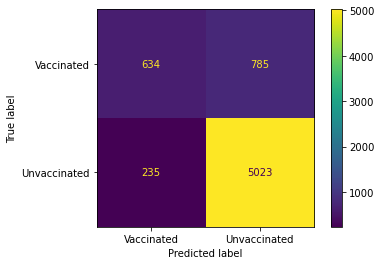

In [55]:
ConfusionMatrixDisplay.from_predictions(y_test, test_pred, display_labels=['Vaccinated', 'Unvaccinated'])

In [56]:
balanced_accuracy_score(y_test, test_pred), balanced_accuracy_score(y_train, train_pred)

(0.7010498583185165, 0.7374895201133747)

In [57]:
precision_score(y_test, test_pred)

0.8648415977961432

In [58]:
recall_score(y_test, test_pred)

0.9553062000760746

In [59]:
roc_auc_score(y_test, test_pred)

0.7010498583185165

**Grid Search for SMOTE** : I tried this, optimizing for both `roc_auc_score` and `recall` and while the grid search parameters were slightly different, the metrics were very similar as shown below, so I selected the best parameters fromm the gridsearch optimizing for roc_auc as the final model.

|Parameter|Optimizing for roc_auc|Optimizing for recall|
|---------|----------------------|---------------------|
booster|gbtree|gbtree|
colsample_bytree|0.9|0.9|
learning_rate|0.05|0.05|
max_depth|7|3|
n_estimators|100|600|
subsample|0.5|1|

|Metric|Optimizing for roc_auc|Optimizing for recall|
|------|----------------------|---------------------| 
|accuracy|0.852|0.852|
|precision|0.879|0.879|
|roc_auc|0.730|0.732
|recall|0.942|0.939|
|balanced_accuracy|0.730|0.732




In [122]:
xg_cls = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='error')

params = {
    'booster' : ['gbtree', 'gblinear'],
    'n_estimators' : [100, 600],
    'max_depth' : [3, 7],
    'learning_rate' : [0.001,0.05],
    'colsample_bytree' : [0.7, 0.9],
    'subsample' : [0.5, 1] 
}

gs = GridSearchCV(estimator=xg_cls, param_grid=params, scoring='recall')

gs.fit(X_train_over, y_train_over)

y_pred = gs.predict(X_test)

[18:25:36] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:25:36] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:25:37] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" 

In [123]:
gs.best_score_

0.9463708399366085

In [124]:
gs.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9,
              enable_categorical=False, eval_metric='error', gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=600, n_jobs=16, num_parallel_tree=1,
              predictor='auto', random_state=42, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)

In [125]:
gs.best_params_

{'booster': 'gbtree',
 'colsample_bytree': 0.9,
 'learning_rate': 0.05,
 'max_depth': 3,
 'n_estimators': 600,
 'subsample': 1}

In [126]:
test_pred = gs.predict(X_test)
train_pred = gs.predict(X_train)

C:\ProgramData\Anaconda3\envs\xgboost\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


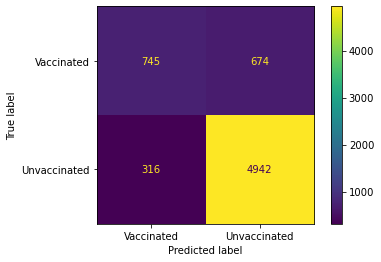

In [127]:
ConfusionMatrixDisplay.from_predictions(y_test, test_pred, display_labels=['Vaccinated', 'Unvaccinated'])

In [128]:
accuracy_score(y_test, test_pred), accuracy_score(y_train, train_pred)

(0.8517298187808896, 0.8667998002995507)

In [129]:
precision_score(y_test, test_pred)

0.8799857549857549

In [130]:
recall_score(y_test, test_pred)

0.9399011030810194

In [131]:
roc_auc_score(y_test, test_pred)

0.7324593605609466

In [132]:
balanced_accuracy_score(y_test, test_pred)

0.7324593605609466

In [147]:
X.columns

Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation', 'h1n1_all', 'behavioral_all', 'opinion_all',
       'doctor_recc_all', 'health_worker_by_age'],
      dtype='object')

### Final Model for feature importance selection

I used the `feature_importances_` property to determine which features were most important for predicting the target label. The results are tabulated below: 

|feature|importance
|-------|----------
|doctor_recc_h1n1|0.2413746
|health_insurance_yes|0.11566545
|opinion_h1n1_vacc_effective|0.05127814
|opinion_h1n1_risk|0.026844215
|health_insurance_no_response|0.025501551
|health_worker|0.017758252
|education_College Graduate|0.016372165
|opinion_seas_risk|0.015200119
|doctor_recc_seasonal|0.014214159
|h1n1_knowledge|0.013103445
|education_no_response|0.013036097
|opinion_seas_vacc_effective|0.0128032435
|employment_industry_fcxhlnwr|0.012155328
|sex_Male|0.011713602
|employment_occupation_dcjcmpih|0.011503535

In [158]:
xgb_best = xgb.XGBClassifier(random_state=42,
                             use_label_encoder=False,
                             eval_metric='error',
                            booster='gbtree',
                            colsample_bytree=0.9,
                            learning_rate=0.05,
                            max_depth=3,
                            n_estimators=600,
                            subsample=1)
xgb_best.fit(X_train_over, y_train_over)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9,
              enable_categorical=False, eval_metric='error', gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=600, n_jobs=16, num_parallel_tree=1,
              predictor='auto', random_state=42, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)

In [159]:
test_pred = xgb_best.predict(X_test)
train_pred = xgb_best.predict(X_train)

C:\ProgramData\Anaconda3\envs\xgboost\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


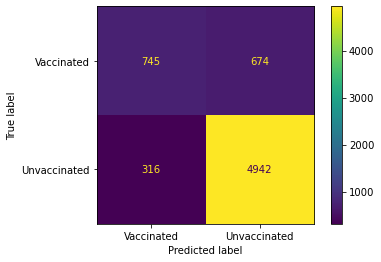

In [160]:
ConfusionMatrixDisplay.from_predictions(y_test, test_pred, display_labels=['Vaccinated', 'Unvaccinated'])

In [161]:
accuracy_score(y_test, test_pred), accuracy_score(y_train, train_pred)

(0.8517298187808896, 0.8667998002995507)

In [162]:
precision_score(y_test, test_pred)

0.8799857549857549

In [163]:
recall_score(y_test, test_pred)

0.9399011030810194

In [164]:
roc_auc_score(y_test, test_pred)

0.7324593605609466

In [165]:
balanced_accuracy_score(y_test, test_pred)

0.7324593605609466

In [166]:
pd.DataFrame({'feature': Xd.columns, 'importance':xgb_best.feature_importances_}).sort_values('importance', ascending=False).head(15).to_csv('../data/XGB_H1N1_feature_imp.csv', index=False)

In [170]:
top_features = pd.DataFrame({'feature': Xd.columns, 'importance':xgb_best.feature_importances_}).sort_values('importance', ascending=False).head(15)

In [171]:
top_features

,feature,importance
15,opinion_h1n1_vacc_effective,0.114573
29,health_insurance_no_response,0.107744
16,opinion_h1n1_risk,0.083394
2,h1n1_knowledge,0.069584
7,behavioral_large_gatherings,0.052834
42,marital_status_Not Married,0.051751
44,rent_or_own_Rent,0.039768
9,behavioral_touch_face,0.035462
19,opinion_seas_risk,0.032780
18,opinion_seas_vacc_effective,0.027051


In [179]:
import matplotlib.pyplot as plt

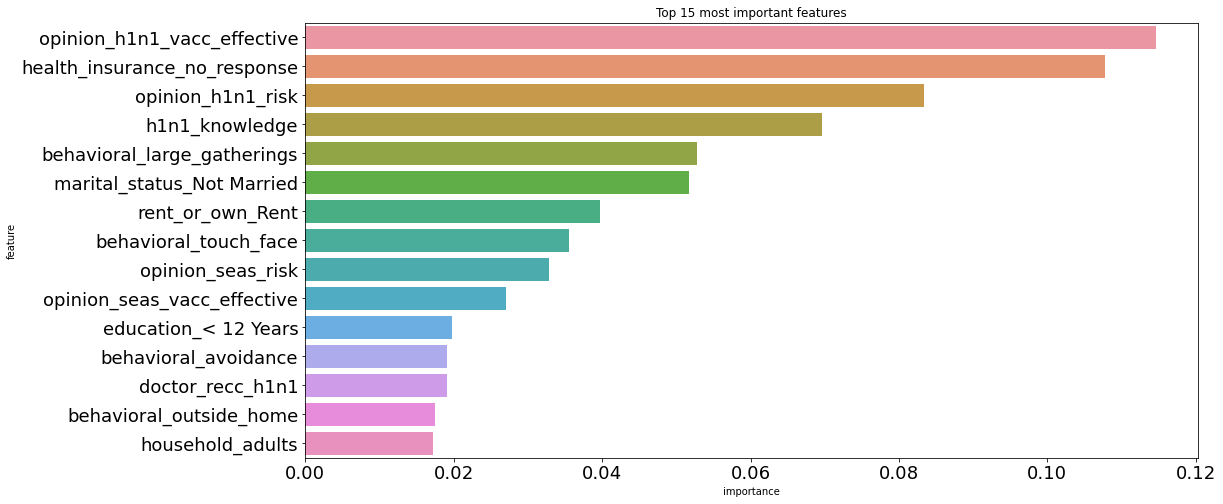

In [180]:
plt.figure(figsize=(16,8))
sns.barplot(data=top_features, y='feature', x='importance')
plt.title("Top 15 most important features")
plt.xticks(size=18)
plt.yticks(size=18);